In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [28]:
file_path = "data/apple_airpods_sales_2017-2023.xlsx"
sheet_name = "Data"
data = pd.read_excel(file_path, sheet_name)
data

,Year,Sales
0,2017,15
1,2018,35
2,2019,60
3,2020,114
4,2021,85
5,2022,82
6,2023,75


In [36]:
def bass_model(t, p, q, m):
    return m * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))


In [38]:
df = pd.DataFrame(data)

df['Cumulative Sales'] = np.cumsum(df['Sales'])

t = np.arange(1, len(df)+1)

F_t = df['Cumulative Sales'].values

# Initial parameter guesses for p, q, m
initial_guess = [0.01, 0.1, max(F_t)]

# Fit the Bass Model
popt, _ = curve_fit(bass_model, t, F_t, p0=initial_guess)

p, q, m = popt
print(f"Estimated Parameters:\n p = {p:.4f}\n q = {q:.4f}\n m = {m:.0f}")

Estimated Parameters:
 p = 0.0242
 q = 0.7492
 m = 525


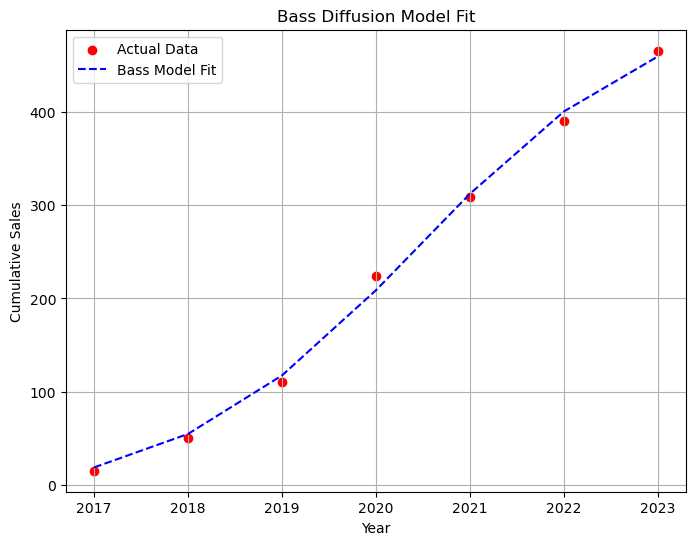

In [112]:
#The Graph of Bass Model Fit

predicted_cumulative_sales = bass_model(t, p, q, m)

plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Cumulative Sales'], color='red', label='Actual Data')
plt.plot(df['Year'], predicted_cumulative_sales, color='blue', label='Bass Model Fit', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Cumulative Sales')
plt.title('Bass Diffusion Model Fit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
p = 0.0242   # Innovation coefficient
q = 0.7492   # Imitation coefficient
m = 525   # Market potential 

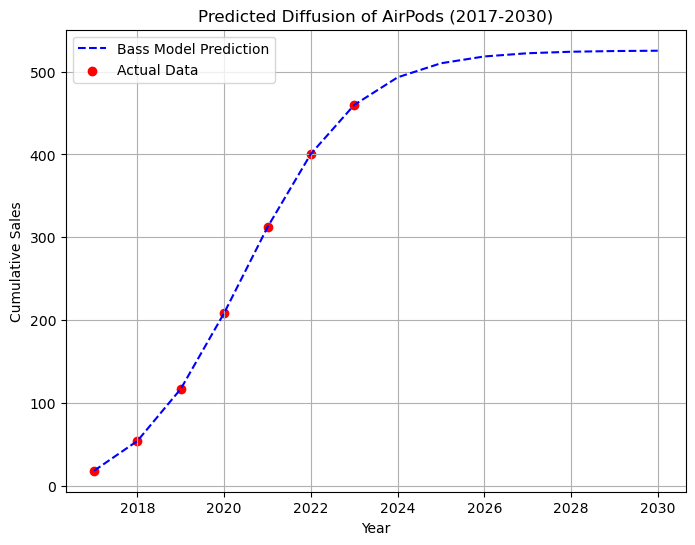

    Year  Predicted Cumulative Sales
0   2017                   18.518310
1   2018                   54.489081
2   2019                  117.259982
3   2020                  208.741041
4   2021                  312.278717
5   2022                  400.679801
6   2023                  459.739349
7   2024                  493.016077
8   2025                  509.989495
9   2026                  518.208421
10  2027                  522.087948
11  2028                  523.897106
12  2029                  524.736007
13  2030                  525.123979


In [44]:
years = np.arange(1, 15)  # 2017-2030 
predicted_cumulative_sales = bass_model(years, p, q, m)

# Create a DataFrame for visualization
predicted_df = pd.DataFrame({'Year': np.arange(2017, 2031), 'Predicted Cumulative Sales': predicted_cumulative_sales})

# Plot Predictions
plt.figure(figsize=(8, 6))
plt.plot(predicted_df['Year'], predicted_df['Predicted Cumulative Sales'], label='Bass Model Prediction', color='blue', linestyle='--')
plt.scatter(predicted_df['Year'][:7], predicted_df['Predicted Cumulative Sales'][:7], color='red', label='Actual Data')
plt.xlabel('Year')
plt.ylabel('Cumulative Sales')
plt.title('Predicted Diffusion of AirPods (2017-2030)')
plt.legend()
plt.grid(True)
plt.show()

print(predicted_df)

In [106]:
years = np.arange(2017, 2031)
time_periods = np.arange(1, len(years)+1)


a_t = [m * bass_model(t, p, q, m) for t in time_periods]

bass_adoption_df = pd.DataFrame({'Year': years, 'Estimated New Adopters': a_t})

print(bass_adoption_df)

    Year  Estimated New Adopters
0   2017             9730.572306
1   2018            28631.659284
2   2019            61615.057855
3   2020           109684.404104
4   2021           164088.982236
5   2022           210539.935197
6   2023           241573.177852
7   2024           259058.661340
8   2025           267977.459763
9   2026           272296.150243
10  2027           274334.674591
11  2028           275285.309048
12  2029           275726.115002
13  2030           275929.977426
